In [551]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [552]:
X = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_features.csv', index_col='respondent_id')
y = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_labels.csv', index_col='respondent_id')
test_set = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/test_set_features.csv', index_col='respondent_id')

In [553]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [554]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

Text(0, 0.5, 'h1n1_vaccine')

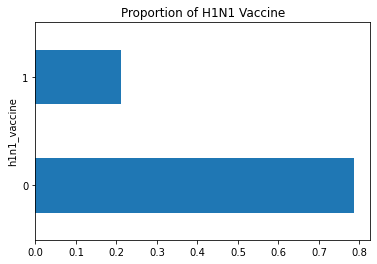

In [555]:
fig, ax = plt.subplots(sharex=True)

n_obs = y.shape[0]

(y['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax)
)
ax.set_ylabel("h1n1_vaccine")

In [556]:
y = pd.Series(y['h1n1_vaccine'])

In [557]:
y.shape

(26707,)

In [558]:
y.value_counts(normalize=True)

0   0.79
1   0.21
Name: h1n1_vaccine, dtype: float64

In [559]:
y

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [560]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [561]:
X.shape

(26707, 35)

In [562]:
X.drop(columns=['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'health_insurance', 'doctor_recc_seasonal', ], inplace=True)

In [563]:
X.shape

(26707, 26)

In [564]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,25736.00,25887.00,25903.00,26316.00,26319.00,26312.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,0.28,0.08,0.11,3.85,2.34,2.36,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,0.45,0.28,0.32,1.01,1.29,1.36,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,3.00,3.00


In [565]:
X.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
household_adults                249
household_children              249
dtype: int64

In [566]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,25736.00,25887.00,25903.00,26316.00,26319.00,26312.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,0.28,0.08,0.11,3.85,2.34,2.36,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,0.45,0.28,0.32,1.01,1.29,1.36,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,3.00,3.00


In [567]:
y.shape

(26707,)

Baseline Model

In [568]:

num_cols = X.select_dtypes('number').columns

ord_cols = ['age_group', 'education',  'income_poverty', 'employment_status']

cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own'] 


cat_cols

['race', 'sex', 'marital_status', 'rent_or_own']

In [569]:
num_cols

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [570]:
# code taken from https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, num_cols), 
        ('cat', cat_transformer, cat_cols)], remainder = "drop")

#estimators = LogisticRegression(penalty="l2", C=1)

log_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
        ("log", LogisticRegression())])

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
        ('tree', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None ))])

kn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
    ('Kn', KNeighborsClassifier())]) 
    
SVC_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
    ('SVC', SVC(random_state=42))])

In [571]:
from sklearn import set_config
set_config(display='diagram')

In [572]:
#pipe = Pipeline(steps=[ 
    #("col_transfer", preprocessor), 
    #('estimators', estimators)])


#X.shape

In [573]:
tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'rent_or_own'])])),
                ('tree', DecisionTreeClassifier())])

In [574]:
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

In [575]:
#pipeline.fit(X_train, y_train)
#pipeline

In [576]:
#clf = Pipeline(steps=[('preprocessing', preprocessor), 
                    #('classifier', 'Grid'])
#X_true.shape

In [577]:
#X_train.describe()

In [578]:
#pipeline.get_params()

In [579]:
#y_pred = pipeline.predict(X_true)

In [580]:
#y_proda = pipeline.predict_proba(X_true)

In [581]:
#plot_roc_curve(pipeline, X_true, y_true)

In [582]:
{
        #"preprocesser__num_transform__imputer__strategy": ["mean", "median"],
        "classifier": [LogisticRegression()], 
        'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
        'classifier__max_iter': [100, 1000, 10000], 
        'classifier__multi_class': ['auto', 'ovr', 'multinomial'], 
        'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
        'classifier__solver': ['lbfgs, ‘liblinear', 'sag', 'saga'],
    },

({'classifier': [LogisticRegression()],
  'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
  'classifier__max_iter': [100, 1000, 10000],
  'classifier__multi_class': ['auto', 'ovr', 'multinomial'],
  'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'classifier__solver': ['lbfgs, ‘liblinear', 'sag', 'saga']},)

In [583]:
#pipeline.estimator.get_params().keys()

In [584]:
from HyperclassifierSearch import HyperclassifierSearch

In [585]:
# code from https://github.com/janhenner/HyperclassifierSearch/blob/main/HyperclassifierSearch%20examples.ipynb

models = {
    'LogisticRegression': LogisticRegression(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'SVC': SVC(random_state=42)
}

In [586]:
params = {
    'LogisticRegression': {'C': [0.1, 1.0, 10.0, 50.0, 100.0]},
    'LogisticRegression': {'max_iter': [100, 1000, 10000]}, 
    'LogisticRegression': {'multi_class': ['auto', 'ovr', 'multinomial']}, 
    'LogisticRegression': {'penalty': ['l1', 'l2', 'elasticnet', 'none']}, 
    'LogisticRegression': {'solver': ['lbfgs, ‘liblinear', 'sag', 'saga']}
}, 
{ 
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy']},
    'DecisionTreeClassifier': {'splitter': ['best', 'random']}, 
    'DecisionTreeClassifier': {'max_depth': [3, 10, 12, 14]}
},
{ #
    'KNeighborsClassifier': {'n_neighbors': [3, 4, 5, 10]}, 
    'KNeighborsClassifier': {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'KNeighborsClassifier': {'weights': ['uniform', 'distance']},
}, 
{
    'SVC': {'loss': ['hinge', 'squared_hinge']},
    'SVC': {'C': [0.01, 0.1, 1.0, 10.0, 50.0]},
    'SVC': {'max_iter': [100, 1000, 10000, 100000]}
} 
        


{'SVC': {'max_iter': [100, 1000, 10000, 100000]}}

In [587]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)
#search = HyperclassifierSearch(models, params)
#best_model = search.train_model(X_train, y_train, cv=2)


In [591]:
# https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb




log_param = { 
        'log__C': [0.01, 0.05, 0.1, 1.0, 10.0],
        'log__max_iter': [100, 1000, 10000], 
        'log__multi_class': ['auto', 'ovr', 'multinomial'], 
        'log__penalty': ['l1', 'l2', 'elasticnet'], 
        'log__solver': ['lbfgs, ‘liblinear', 'sag', 'saga']
}

tree_param = { 
        'tree__criterion': ['gini', 'entropy'],
        'tree__splitter': ['best', 'random'], 
        'tree__max_depth': [2, 3, 4, 5, 6, 7, 8], 
        'tree__min_weight_fraction_leaf': [0.0, 0.10, 0.15, 0.17, 0.20, 0.22, 0.25, 0.5, 0.75], 
        'tree__max_features': ['auto', 'sqrt', 'log2', None], 
        'tree__class_weight': ['balanced']
        }



Kn_param = {
        'Kn': [KNeighborsClassifier()],
        'Kn__n_neighbors': [3, 4, 5, 10], 
        'Kn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'Kn__weights': ['uniform', 'distance']}

SVC_param = {
        'SVC': [SVC()],
        'SVC__loss': ['hinge', 'squared_hinge'], 
        'SVC__C': [0.01, 0.1, 1.0, 10.0, 50.0],
        'SVC__random_state': [42], 
        'SVC__max_iter': [100, 1000, 10000, 100000]
}
grid_search = GridSearchCV(estimator=kn_pipeline, param_grid=Kn_param, cv=2, verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  5.1min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler()),
                                                                                         ('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'be...
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['race',
                                                                          'sex',
                                                                          'marital_status',
                                                                          'rent_or_own'])])),
                                       ('Kn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'Kn': [KNeighborsClassifier(algorithm='brute',
                                                     n_neighbors=10)],
                         'Kn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                           'brute'],
                         'Kn__n_neighbors': [3, 4, 5, 10],
                         'Kn__weights': ['uniform', 'distance']},
             verbose=3)

In [592]:
best_mod = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  4.7min finished


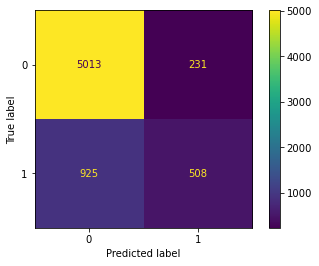

In [593]:
plot_confusion_matrix(best_mod, X_test, y_test)

In [ ]:
grid_X = grid_search.fit(X_train)


In [ ]:
grid_search.predict(X_train)

In [ ]:
plot_confusion_matrix()

In [ ]:
print(grid_search.best_params_)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
{
    'classifier': [KNeighborsClassifier()],
    'classifier_n_neighbors': [1, 2, 3, 5, 8, 10, 15], 
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [10, 15, 20, 30, 50, 75]
    'classifier__weights': ['uniform', 'distance'], 
    'classifier_max_iter': [100, 100, 1000]
    },

{
    'classifier': [LinearSVC()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__loss': ['hinge', 'squared_hinge'], 
    'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
    'classifier__random_state': 42, 
    'classifier_max_iter': [100, 100, 1000]
}

In [ ]:
y_pred

In [ ]:
roc_auc_score(y_true, y_pred)


In [ ]:
output = cross_validate(tree_pipeline, X_train, y_train, cv=3)
print(f"Average ROC-AUC: {output['test_score'].mean()} +/- {output['test_score'].std()}")

In [ ]:
output

#plot_roc_curve(clf, X_train, y_train)

In [ ]:

grid_search.score(X_test, y_test)

In [ ]:

grid_search.cv_results_

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV

best_param_setting = grid_search.cv_results_['params'][grid_search.best_index_]
best_param_setting

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
#accuracy_score(y_train,y_pred)

print(grid_search)

In [ ]:
grid_search.best_score_

In [ ]:
clf.score(X_test, y_test)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
y_pred.shape

In [ ]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
coef = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf['classifier'].coef_))],axis=1)

In [ ]:
print(coef)

In [ ]:
plot_confusion_matrix(clf, y_test, y_pred)